In [17]:
# importing numpy , Sequentail, and Convultinoal and more libraries for training
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten #here we are inmporting layers for our CNN , we have convulutional 1D,2D and 3D.. Conv2D is mostly used for videos and Conv2D mostly for images 

# LOAD DATASET

In [8]:
# Remeber ,Keras runs on top of Tensflow .... plus the main focus here is just to get started with keras and do a simple model for detecting if an image is a cat or dog
#Below we are loading the dataset we are to use 
X_train = np.loadtxt('input.csv',delimiter = ',')
Y_train =np.loadtxt('labels.csv',delimiter =',')

X_test  =np.loadtxt('input_test.csv',delimiter = ',')
Y_test = np.loadtxt('labels_test.csv',delimiter = ',')

In [13]:
# Reshaping into appropriate image sizes 
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train =Y_train.reshape(len(Y_train),1)

X_test = X_test.reshape(len(X_test),100,100,3)
Y_test =Y_test.reshape(len(Y_test),1) 

# By dividing the pixel values by 255.0, you scale them to a range of 0 to 1.
# This is called normalization, and it is done to:

# 1)Standardize the data.
# 2)Improve the efficiency and stability of the neural network's training process.

X_train = X_train/255.0
Y_train =Y_train/255.0

In [14]:
print("Shape of X_train", X_train.shape)
print("Shape of Y_train", Y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of Y_test", X_test.shape)

Shape of X_train (2000, 100, 100, 3)
Shape of Y_train (2000, 1)
Shape of X_test (400, 100, 100, 3)
Shape of Y_test (400, 100, 100, 3)


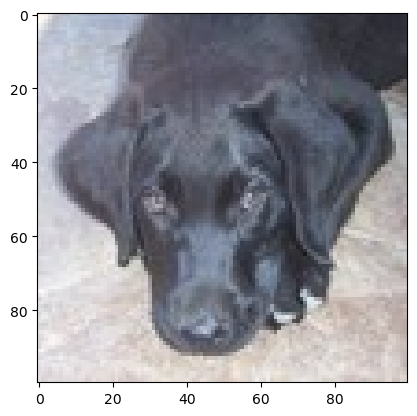

In [23]:
# printing a single image data randmoly from zero to the length of the data set 
idx= random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()
# X_train[1,:]

# Model Training with Keras

In [28]:
# Sequential model means that the layers are going to be stacked up in  the sequence for example first we have convulutional layere , max pooling layer, and Another convulutional layer and more other layere , fully connected layere ... etc
# So we will be stacking these layers in a sequece , so inside the sequential we write our layers 
model = Sequential([
    Conv2D(32,(3,3),activation ='relu', input_shape =(100,100,3)), # first parameter of convulation layer is the number of filters we want to use like here we are using 32 number of filters, then next paramter is the size of the filter we want to use e.g here we are using 3,3, then we mention the activation function we are to use and here we are using "relu"
    ## plus we tell the shape we are expecting which is (100,100,3)
    MaxPooling2D((2,2)),
    # Maxpooling layer is our second layer we have added after convultion layer and we specify the filter size which is a 2,2 here 
    #Then we add another convulation layere .. which is our third layer here.. and here we don't need to mention the input sahpe which is for the first layer
    Conv2D(32,(3,3),activation ='relu'),
     # then another coonvulation layer 
    MaxPooling2D((2,2)),
    # another max pooling layer

    ## then flatten and finally add Dense layere which means fully connected layer

    Flatten(),
    Dense(64, activation = 'relu'), # the first parameter indicates the number of nurons we want to keep in that layer
    #let's say this is the final fully connected layer

    Dense(1,activation ='sigmoid'),# we are using "sigmoid " because this is a binary classification
])

In [38]:
# then we add loss function and backward propagation to improve it's accurancy, metrics ... thses are metric in which we want to evaute our model
model.compile(loss='binary_crossentropy', optimizer ='adam', metrics =['accuracy'])

In [39]:
## actual traing
model.fit(X_train, Y_train, epochs =5, batch_size = 64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.4976 - loss: 0.0146
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 265ms/step - accuracy: 0.5098 - loss: 0.0134
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 238ms/step - accuracy: 0.4981 - loss: 0.0137
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 262ms/step - accuracy: 0.5090 - loss: 0.0135
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 249ms/step - accuracy: 0.5046 - loss: 0.0134


In [41]:
#Evalution of  the model with "evalute"
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7916 - loss: 133.2693


[315.6744384765625, 0.5]

# Making predicition for individual images 

In [46]:
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred =model.predict(X_test[idx2, :].reshape(1,100,100, 3))
y_pred = y_pred >0.5

if(y_pred == 0):
  pred = 'dog'

else:
   pred ='cat'

    print("our model says it is a :", pred)

IndentationError: unexpected indent (3758226653.py, line 14)